In [1]:
## Import the required libraries
import pandas as pd
import pyforest
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.metrics import confusion_matrix
import missingno as msno
from wordcloud import WordCloud
warnings.filterwarnings("ignore")

In [2]:
## load the dataset
df = pd.read_csv('train.csv', sep = ',')
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [3]:
## Explore the datatypes of each columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [24]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [25]:
## Explore the size of the data
df.shape
## The data has 74111 rows x 29 columns


(74111, 29)

In [26]:
## check if there are any null values in the dataframe
df.isnull().values.any()

True

In [27]:
## check for specific columns with null values
for column in df.columns:
    if df[column].isnull().sum() != 0: ## if the total null values in a column are not zero then return the column, the number of missing values and the data types
        print("\n{} :- {},  dtypes : {}".format(column,df[column].isnull().sum(),df[column].dtypes))
##bthere are 13 clumns with missing values


bathrooms :- 200,  dtypes : float64

first_review :- 15864,  dtypes : object

host_has_profile_pic :- 188,  dtypes : object

host_identity_verified :- 188,  dtypes : object

host_response_rate :- 18299,  dtypes : object

host_since :- 188,  dtypes : object

last_review :- 15827,  dtypes : object

neighbourhood :- 6872,  dtypes : object

review_scores_rating :- 16722,  dtypes : float64

thumbnail_url :- 8216,  dtypes : object

zipcode :- 966,  dtypes : object

bedrooms :- 91,  dtypes : float64

beds :- 131,  dtypes : float64


## Handling missing data & EDA

In [40]:
df['host_since']

0        2012-03-26
1        2017-06-19
2        2016-10-25
3        2015-04-19
4        2015-03-01
            ...    
74106    2013-03-24
74107    2016-05-03
74108    2012-01-05
74109    2017-09-17
74110    2012-11-26
Name: host_since, Length: 74111, dtype: object

<Axes: >

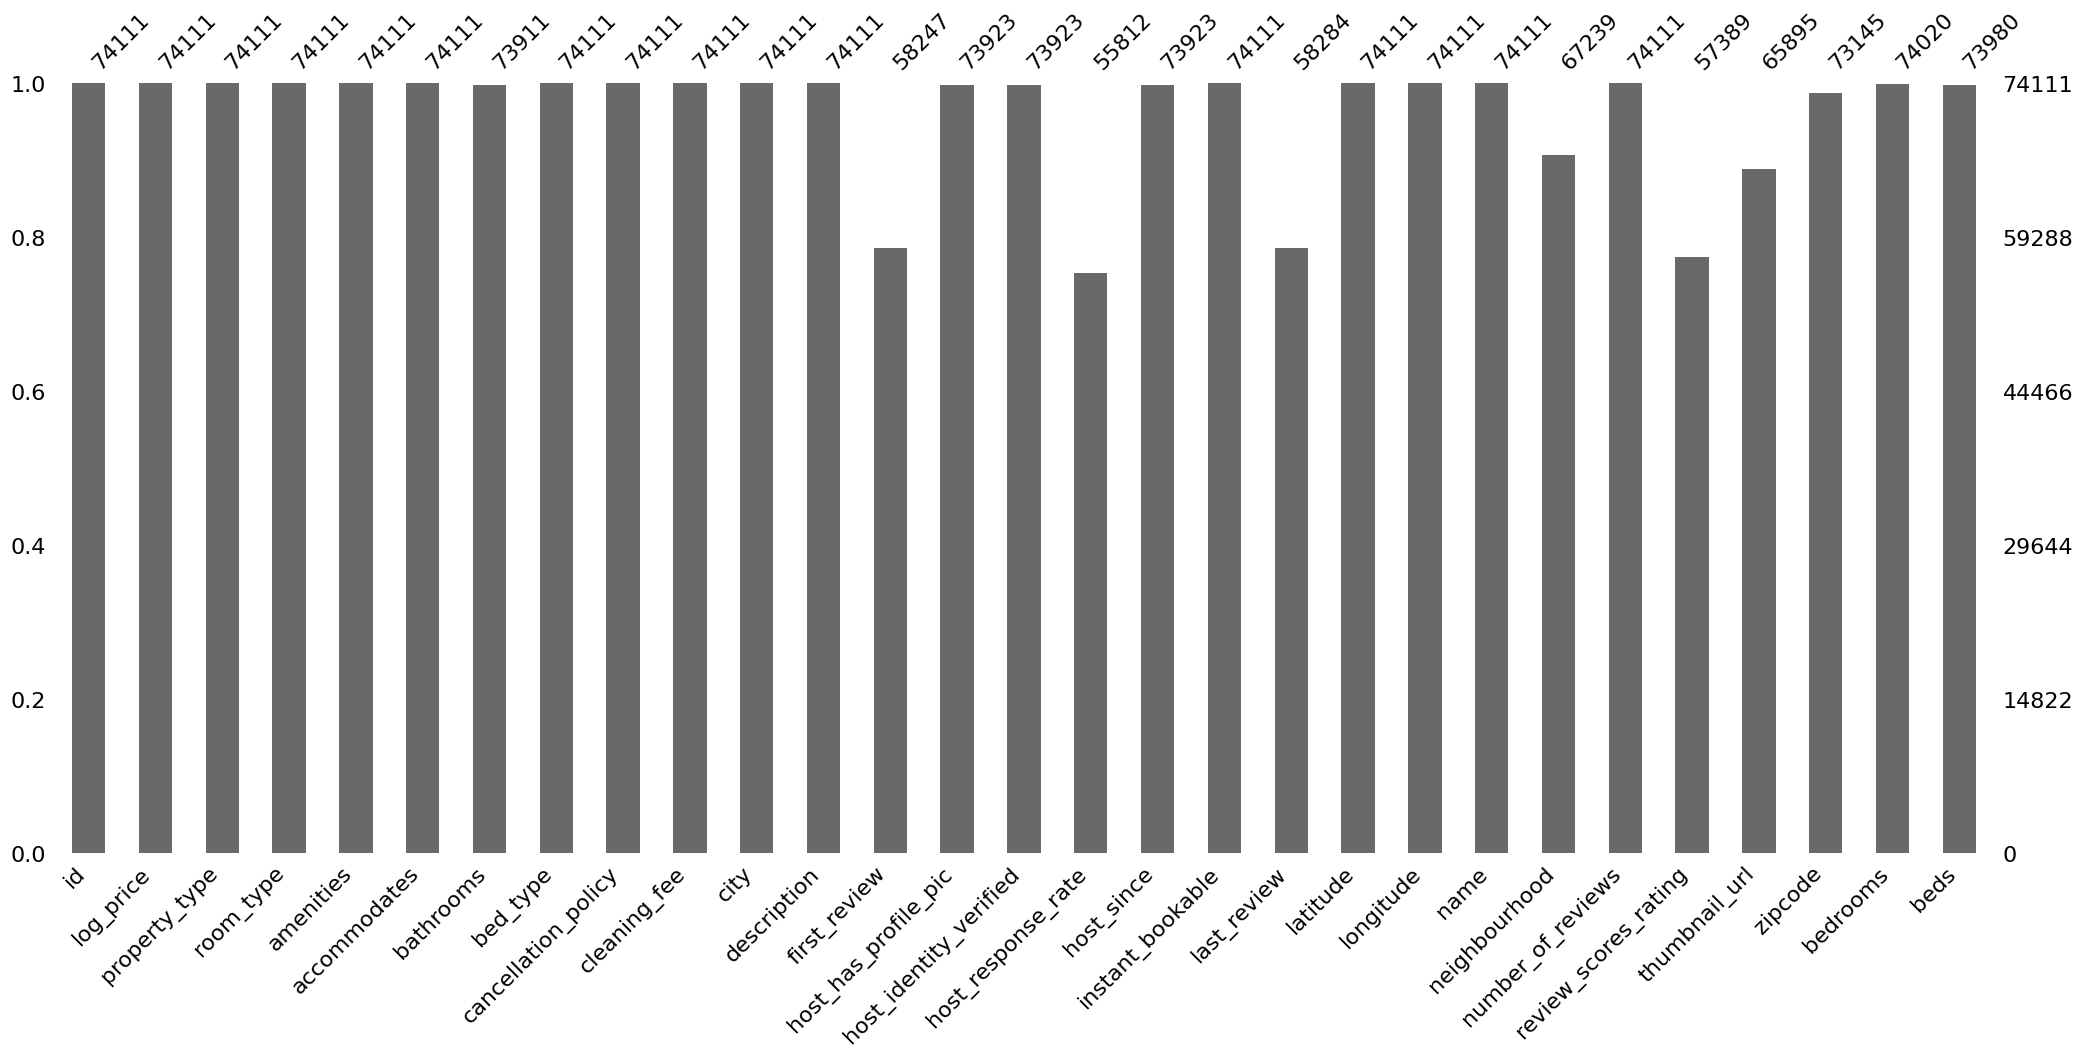

In [28]:
##Use median to impute numeric columns since median is not
#Visualizing missing values with Missingno 
#By analyzing how the data is distributed, we cna conclude that the values are missing at random
msno.bar(df)

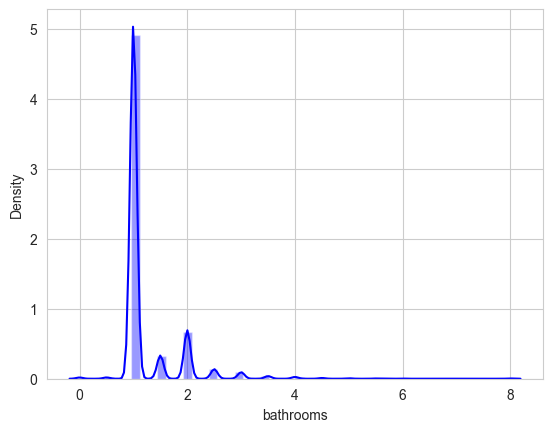

In [33]:
##Distplot represents the overall distribution of continuous data variables.
## displays the overall dispersion of real-time data parameters. 
sns.set_style('whitegrid')
sns.distplot(df["bathrooms"], color ='blue')
plt.show()

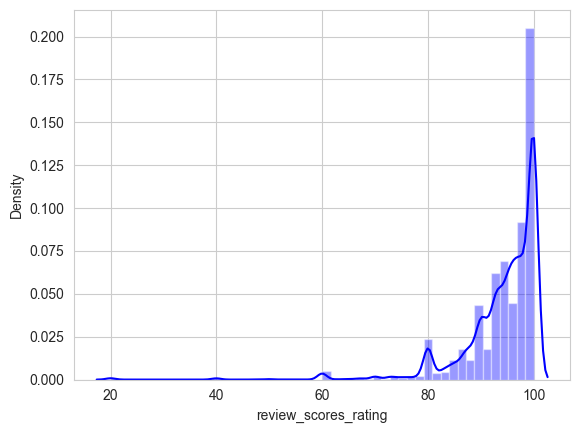

In [34]:
sns.set_style('whitegrid')
sns.distplot(df["review_scores_rating"], color ='blue')
plt.show()

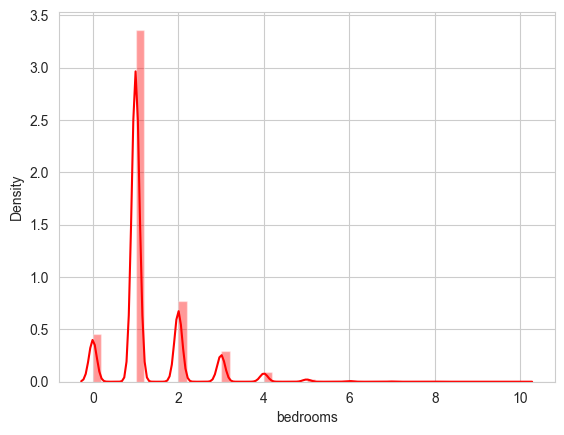

In [36]:
sns.set_style('whitegrid')
sns.distplot(df["bedrooms"], color ='red')
plt.show()

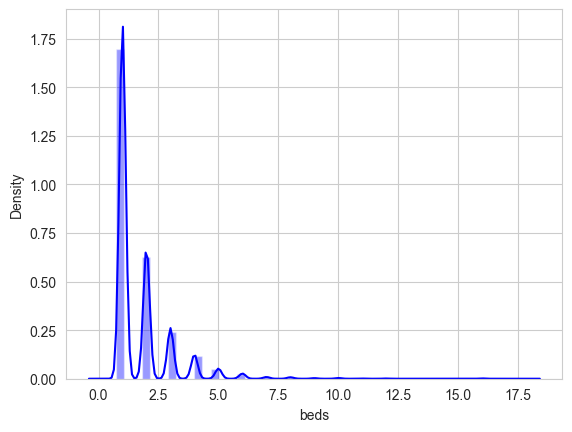

In [37]:
sns.set_style('whitegrid')
sns.distplot(df["beds"],color = 'blue')
plt.show()

### Fill na values for continuous varibles using median

In [38]:
df["bathrooms"] = df['bathrooms'].fillna(round(df["bathrooms"].median()))
df["bedrooms"] = df['bedrooms'].fillna(round(df["bedrooms"].median()))
df["beds"] = df['beds'].fillna(round(df["beds"].median()))
df["review_scores_rating"] = df['review_scores_rating'].fillna(round(df["beds"].median()))

## Fill na values for date columns using ‘ffill’ which stands for ‘forward fill’ and will propagate last valid observation forward.

In [41]:

df['last_review'] = df['last_review'].fillna(method='ffill')
df['first_review'] = df['first_review'].fillna(method='ffill')
df['host_since'] = df['host_since'].fillna(method='ffill')

In [45]:

percent_missing_hostresponse = df['host_response_rate'].isnull().sum() * 100 / len(df)
percent_missing_hostresponse


24.691341366328885

In [49]:
## fill na values for some categorical values using most common values
df["host_has_profile_pic"] = df['host_has_profile_pic'].fillna(df['host_has_profile_pic'].mode())
df['host_identity_verified'] = df['host_identity_verified'].fillna(df["host_identity_verified"].mode())

## EDA

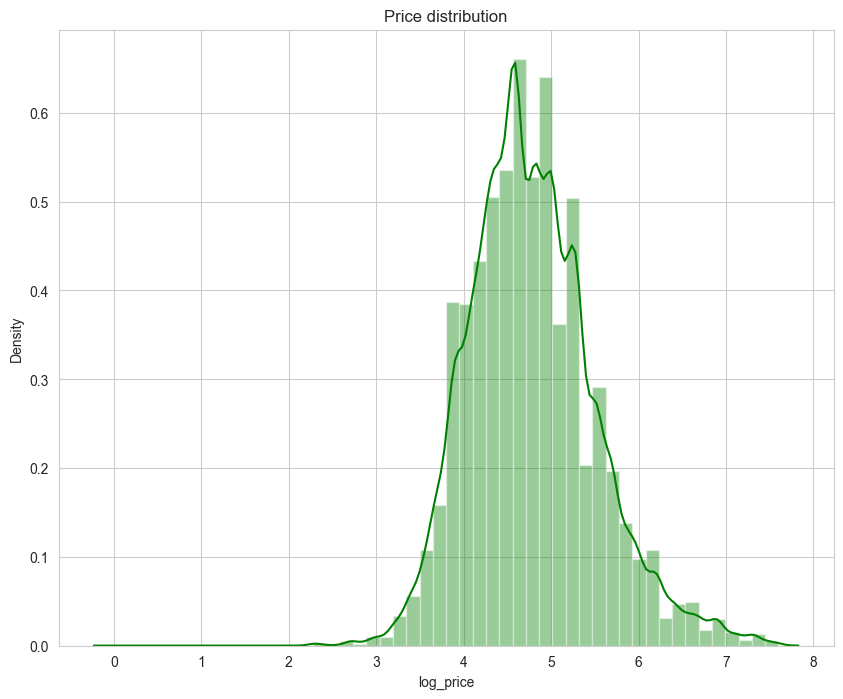

In [53]:
## check price distribution
sns.set_style('whitegrid')
plt.figure(figsize = (10, 8))
sns.distplot(df["log_price"], color='green')
plt.title('Price distribution')
plt.show()

In [56]:
## Assuming no houses can be free we need to drop those observations with price =0
df['log_price'].describe()

count    74111.000000
mean         4.782069
std          0.717394
min          0.000000
25%          4.317488
50%          4.709530
75%          5.220356
max          7.600402
Name: log_price, dtype: float64

In [57]:
df['log_price'] = df['log_price'][(df['log_price'] != 0)] # drop zeros

## Check how variables are correlated with each other


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74110 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               74111 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            74111 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

<Axes: >

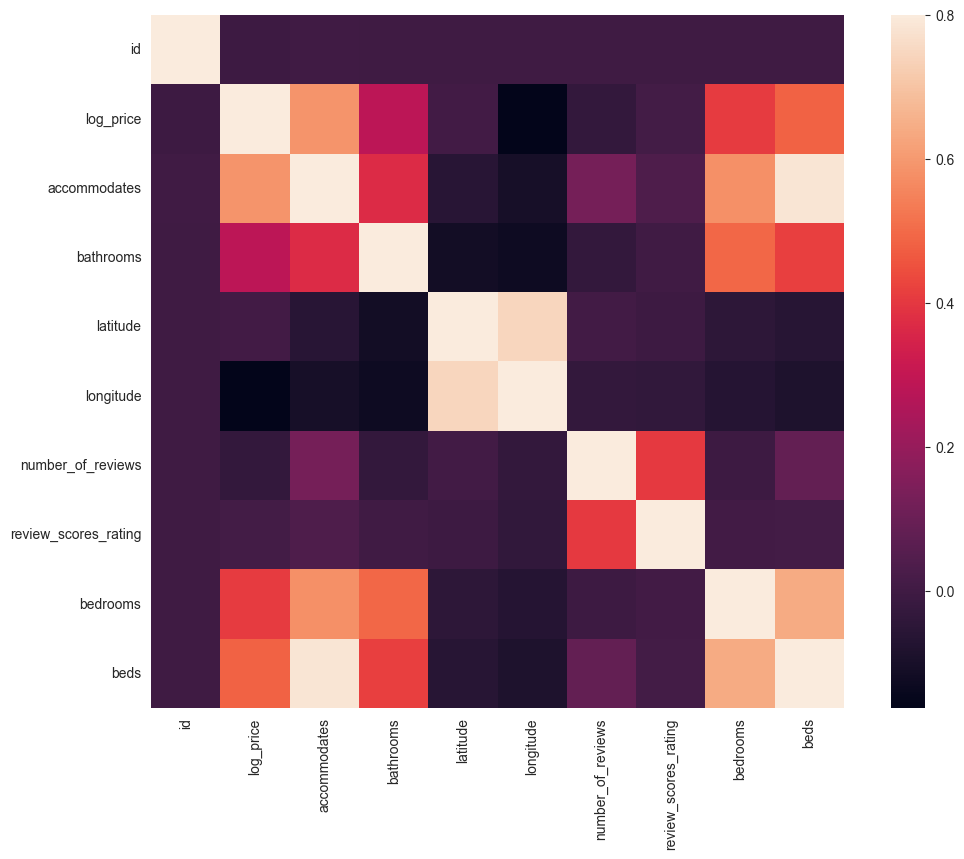

In [65]:
#correlation matrix
# Select only numeric data and plot a correlation matrix
## we observe that the beds are more correlated to the logprice
numerics = ['int64','float64']
data = df.select_dtypes(include=numerics)
corrmat = data.corr(method = 'spearman')
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [66]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [67]:
## we can also observe which words are most porpular by visualizing the categorizal features
amenities = ' '.join(df['amenities'].tolist())
amenities_wordcloud = WordCloud(background_color='white', max_font_size=50).generate(amenities)

description = ' '.join(df['description'].tolist())
description_wordcloud = WordCloud(background_color='white', max_font_size=50).generate(description)

name = ' '.join(df['name'].tolist())
name_wordcloud = WordCloud(background_color='white', max_font_size=50).generate(name)

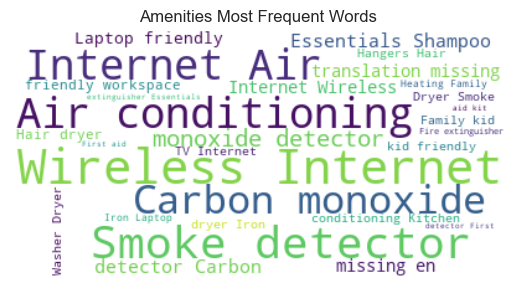

In [69]:
## frequent words that appear in amenities. 
plt.imshow(amenities_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Amenities Most Frequent Words')
plt.show()

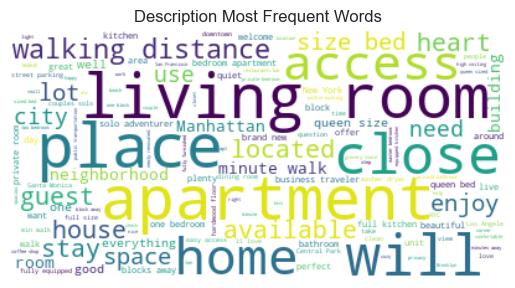

In [70]:
plt.imshow(description_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Description Most Frequent Words')
plt.show()

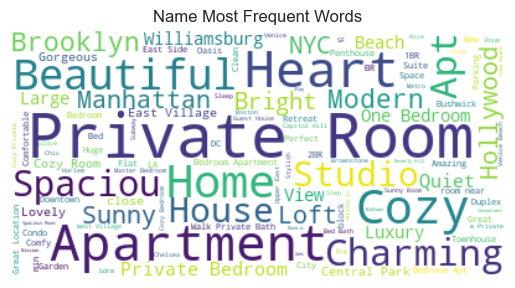

In [71]:
plt.imshow(name_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Name Most Frequent Words')
plt.show()

The most frequent words in all the features above include; room, home, appartment

### Visualize most popular cities and Neighbourhoods

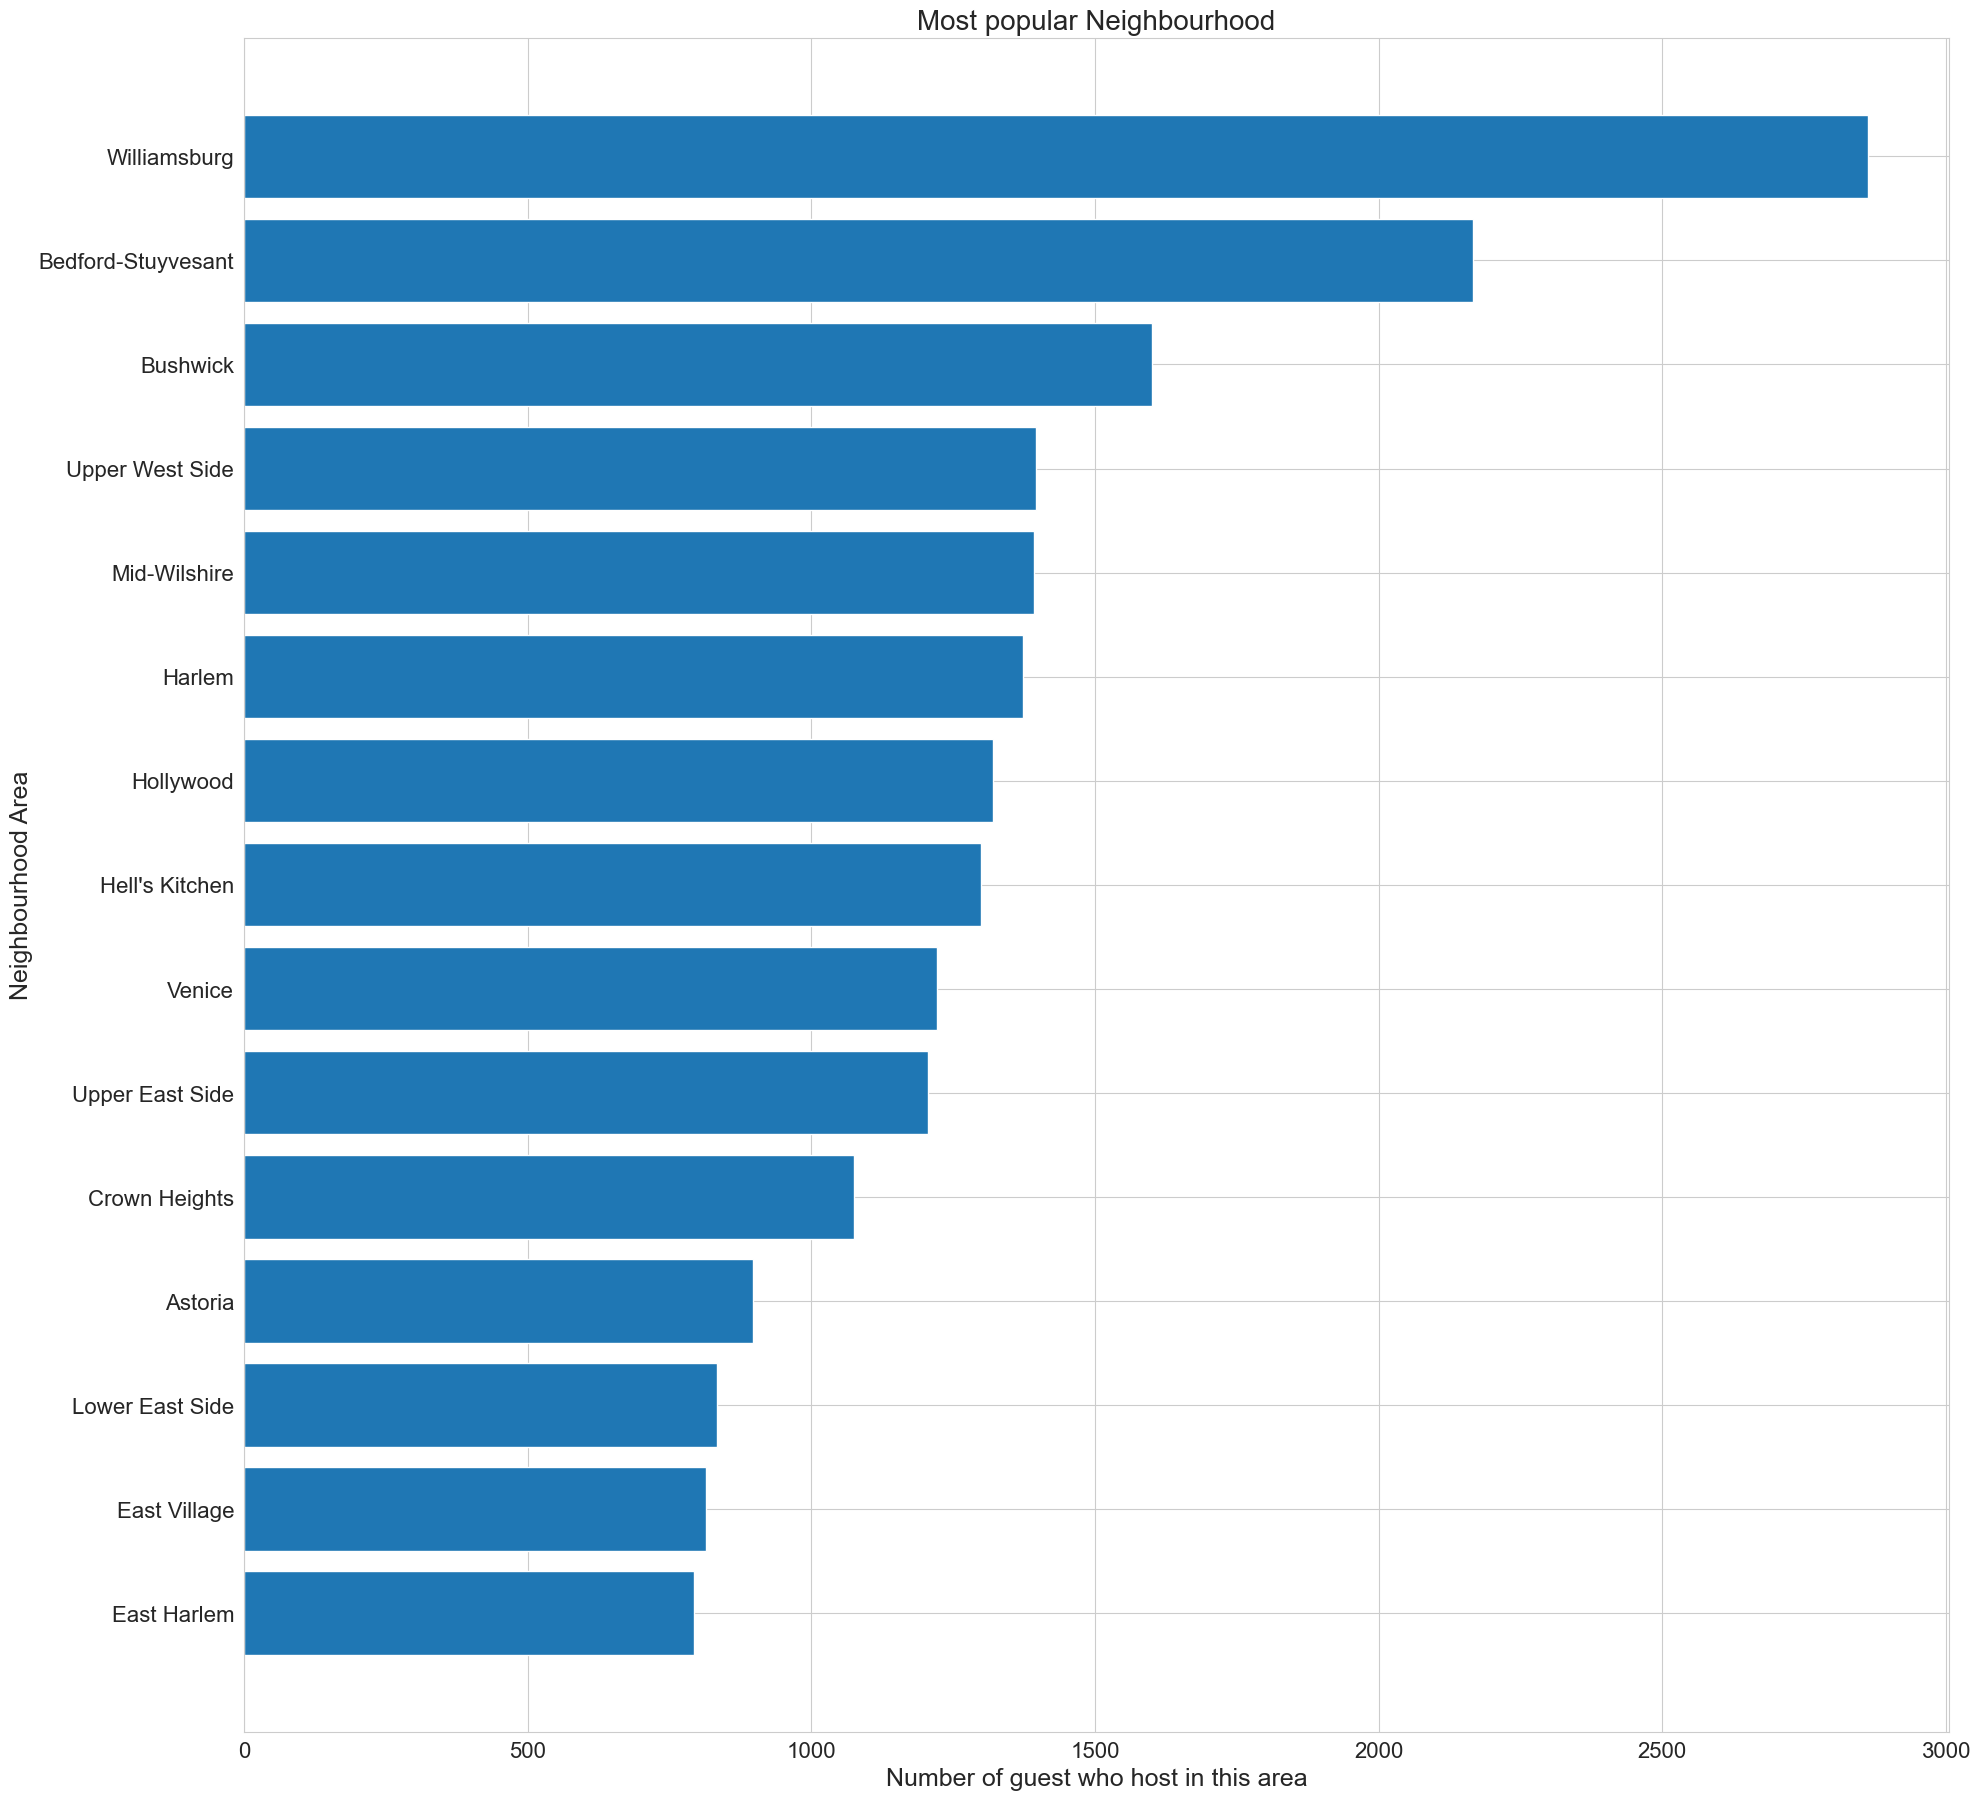

In [76]:
Top_most = df.neighbourhood.value_counts()[:15]
plt.figure(figsize=(22,22))
x = list(Top_most.index)
y = list(Top_most.values)
x.reverse()
y.reverse()
plt.title("Most popular Neighbourhood",  fontsize=20)
plt.ylabel("Neighbourhood Area",fontsize=18)
plt.xlabel("Number of guest who host in this area", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.barh(x,y)
plt.show()

## Prepare data for Model prediction

In [79]:
df.dropna(inplace=True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44249 entries, 1 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      44249 non-null  int64  
 1   log_price               44249 non-null  float64
 2   property_type           44249 non-null  object 
 3   room_type               44249 non-null  object 
 4   amenities               44249 non-null  object 
 5   accommodates            44249 non-null  int64  
 6   bathrooms               44249 non-null  float64
 7   bed_type                44249 non-null  object 
 8   cancellation_policy     44249 non-null  object 
 9   cleaning_fee            44249 non-null  bool   
 10  city                    44249 non-null  object 
 11  description             44249 non-null  object 
 12  first_review            44249 non-null  object 
 13  host_has_profile_pic    44249 non-null  object 
 14  host_identity_verified  44249 non-null  obj

In [89]:
alldata = df.copy()
categorical = []
for col in alldata.columns:
    if alldata[col].dtypes == 'object':
        categorical.append(col)
print(categorical)

['property_type', 'room_type', 'amenities', 'bed_type', 'cancellation_policy', 'city', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'instant_bookable', 'last_review', 'name', 'neighbourhood', 'thumbnail_url', 'zipcode']


In [92]:
# Store the numerical columns in a list numerical
numerical = alldata.columns.difference(categorical)
print(numerical)

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'id',
       'latitude', 'log_price', 'longitude', 'number_of_reviews',
       'review_scores_rating'],
      dtype='object')


In [93]:
## perform numerical encoding 
categorical_data = alldata[categorical]
categorical_data = pd.get_dummies(categorical_data) ## change categorical values to numeric

numerical_data = alldata[numerical]
final_data = pd.concat([numerical_data, categorical_data], axis=1)
print(final_data.head())

In [ ]:
## Separate your data to explanatory and response variables 
X = final_data.drop(['log_price'], axis = 1) 
y = final_data[['log_price']]